# **Loan Approval Project**
## Table of Content
1. Introduction
2. Data Understanding
3. Data Preparation
4. Modeling & Evaluation

# 1.0 Introduction

The objective of this project is to use historical loan data to analyse and identify possible loan defaulters. Rejecting possible loan defaulters decreases the financial loss incurred by the bank, hence the importance of building an efficient model to determine the approval of a loan.


Data is taken from Lending Club, which will be referred to as the Bank.

# 2.0 Data Understanding

**Environment Setup**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2.1 Data Description

### 2.1.1 Features Description

**id**: Unique ID of the loan application.

**grade**: Bank's assigned loan grade.

**annual_inc**: The self-reported annual income provided by the borrower during registration.

**short_emp**: 1 when employed for 1 year or less.

**emp_length_num**: Employment length in years. Possible values are - between 0 and 10 where 0 means less than one year and 10 means ten or more years.

**home_ownership**: Type of home ownership.

**dti** (Debt-To-Income Ratio): A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

**purpose**: A category provided by the borrower for the loan request.

**term**: The number of payments on the loan. Values are in months and can be either 36 or 60.

**last_delinq_none**: 1 when the borrower had at least one event of delinquency.

**last_major_derog_none**: 1 when the borrower had a bad rating for at least 90 days.

**revol_util**: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

**total_rec_late_fee**: Late fees received to date.

**od_ratio**: Overdraft ratio.

**bad_loan**: 1 when a loan was not paid.

In [2]:
# Load dataset
df = pd.read_csv('lending_club_loan_dataset.csv')

# Print dataframe head
df.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


### 2.1.2 Dataset Information

In [3]:
# Print dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

### 2.1.3 Missing Values

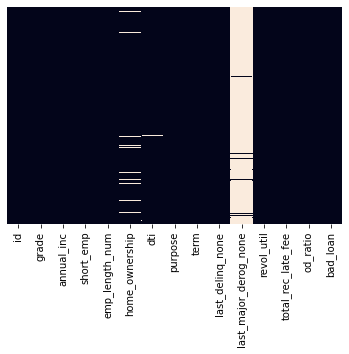

In [4]:
# Plot missing values using colours (Light = Missing)
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.show()

In [5]:
# Sum missing values in dataframe
df.isna().sum()

id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1491
dti                        154
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
bad_loan                     0
dtype: int64

### Data Description Summary:
- 20,000 rows by 15 features.
- Data comprised of categorical and numerical features.
 - 9 Categorical: id, grade, short_emp, home_ownership, purpose, term, last_delinq_none, last_major_derog_none, bad_loan.
 - 6 Numerical: annual_inc, emp_length_num, dti, revol_util, total_rec_late_fee, od_ratio.
- Missing values present in **'home_ownership'**, **'dti**', and **'last_major_derog_none'**. 
 - Significant missing values present in **'last_major_derog_none'** - 97% are missing.
- Target variable: **'bad loan'**.

## 2.2 Data Exploration and Analysis

### 2.2.1 Target Variable

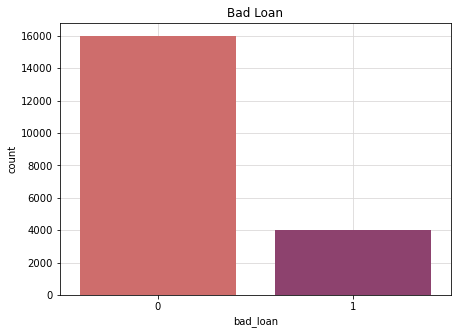

In [6]:
# Plot countplot
fig = plt.figure(figsize=(7,5))
sns.countplot(x='bad_loan', data=df, palette='flare')

# Visual settings
plt.grid(True, axis='both', color='#DAD8D7')
plt.gca().set_axisbelow(True)
plt.title('Bad Loan')
plt.show()

- Unbalanced distribution of target class, 4:1 ratio.

### 2.2.2 Categorical Features

#### Grade

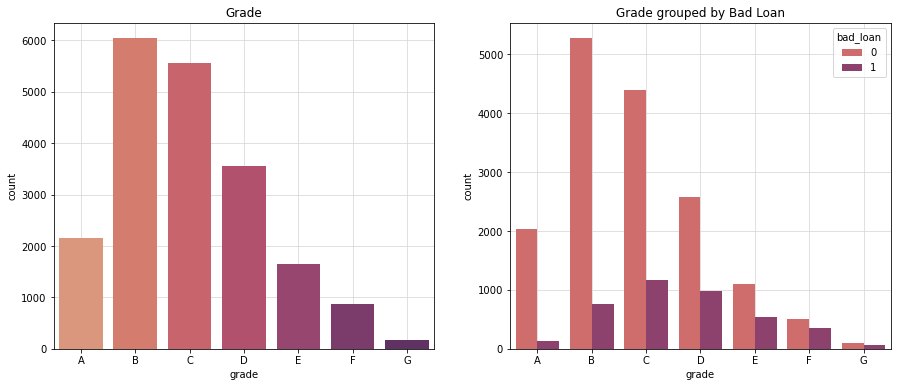

In [7]:
# Initialise 2 side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot countplots
sns.countplot(ax=axes[0], x='grade', data=df, palette='flare', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
axes[0].set_title('Grade')
sns.countplot(ax=axes[1], x='grade', data=df, palette='flare', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue='bad_loan')
axes[1].set_title('Grade grouped by Bad Loan')

# Visual settings
axes[0].grid(True, axis='both', color='#DAD8D7')
axes[0].set_axisbelow(True)
axes[1].grid(True, axis='both', color='#DAD8D7')
axes[1].set_axisbelow(True)
plt.show()

- Instances of defaulters increases as Grade level decreases. Stronger assigned Grade imples lower chance of individual defaulting.

#### Short Employment

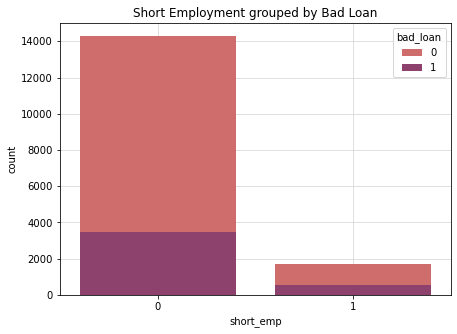

In [8]:
# Plot countplot
plt.figure(figsize=(7,5))
sns.countplot(x='short_emp', data=df, palette='flare', hue='bad_loan', dodge=False)

# Visual settings
plt.grid(True, axis='both', color='#DAD8D7')
plt.gca().set_axisbelow(True)
plt.title('Short Employment grouped by Bad Loan')
plt.show()

- Individuals employed for more than a year makes up the majority of borrowers. 

#### Home Ownership

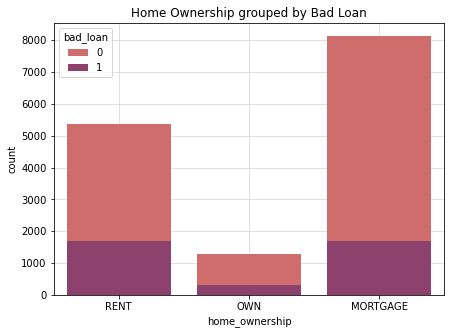

In [9]:
# Plot countplot
plt.figure(figsize=(7,5))
sns.countplot(x='home_ownership', data=df, palette='flare', hue='bad_loan', dodge=False)

# Visual settings
plt.grid(True, axis='both', color='#DAD8D7')
plt.gca().set_axisbelow(True)
plt.title('Home Ownership grouped by Bad Loan')
plt.show()

- Half of borrowers have their homes on mortgage.
- By ratio, Mortgage borrowers had lesser defaulters than Rent borrowers.

#### Purpose

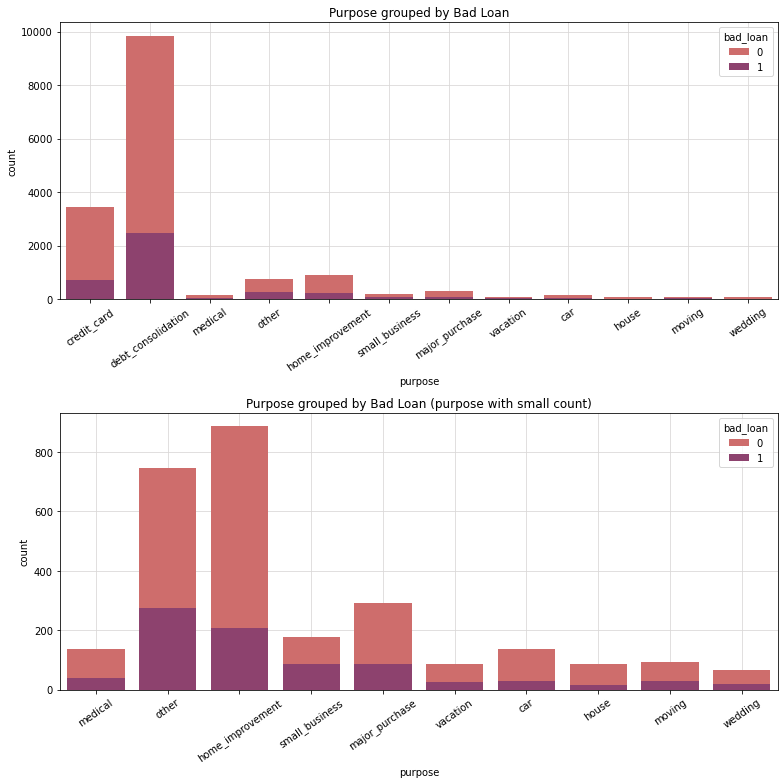

In [10]:
# Initialise 2 stacked plots
fig, axes = plt.subplots(2, 1, figsize=(11, 11))

# Plot countplots
sns.countplot(ax=axes[0], x='purpose', data=df, palette='flare', hue='bad_loan', dodge=False)
axes[0].set_title('Purpose grouped by Bad Loan')
axes[0].tick_params(axis='x', labelrotation=35)

sns.countplot(ax=axes[1], x='purpose', data=df[(df['purpose'] != 'credit_card') & (df['purpose'] != 'debt_consolidation')], 
                                                palette='flare', hue='bad_loan', dodge=False)
axes[1].set_title('Purpose grouped by Bad Loan (purpose with small count)')
axes[1].tick_params(axis='x', labelrotation=35)


# Visual settings
axes[0].grid(True, axis='both', color='#DAD8D7')
axes[0].set_axisbelow(True)
axes[1].grid(True, axis='both', color='#DAD8D7')
axes[1].set_axisbelow(True)
fig.tight_layout()
plt.show()

- Debt Consolidation was the most popular reason for borrowing, makes up more than half.
- Borrowing for Small Business had the worst outcome, 1 every 2 individual defaulted.

#### Term

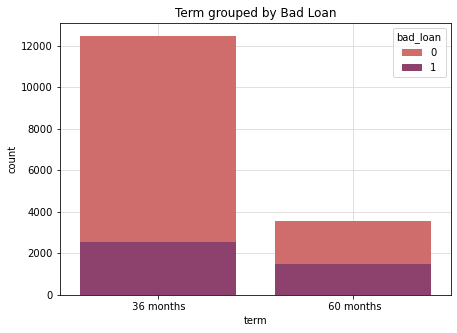

In [11]:
# Standardise values
df.loc[df['term'] == ' 36 Months', 'term'] = ' 36 months'

# Plot countplot
plt.figure(figsize=(7,5))
sns.countplot(x='term', data=df, palette='flare', hue='bad_loan', dodge=False)

# Visual settings
plt.grid(True, axis='both', color='#DAD8D7')
plt.gca().set_axisbelow(True)
plt.title('Term grouped by Bad Loan')
plt.show()

- Longer term loans tend to have more defaulters.

#### Delinquency

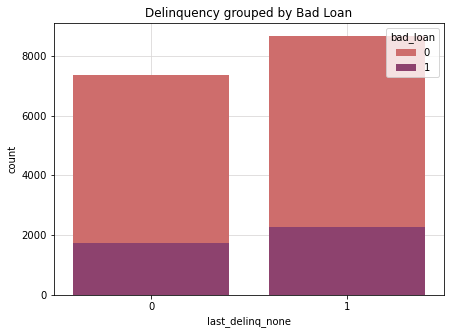

In [12]:
# Plot countplot
plt.figure(figsize=(7,5))
sns.countplot(x='last_delinq_none', data=df, palette='flare', hue='bad_loan', dodge=False)

# Visual settings
plt.grid(True, axis='both', color='#DAD8D7')
plt.gca().set_axisbelow(True)
plt.title('Delinquency grouped by Bad Loan')
plt.show()

- No significant difference of individuals with or without delinquency.

#### Bad Rating

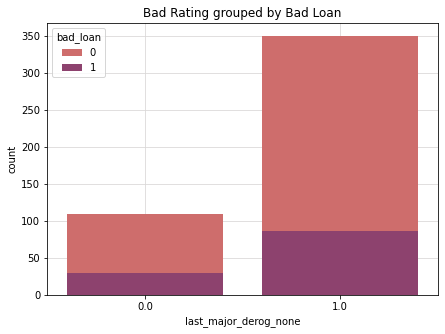

In [13]:
# Plot countplot
plt.figure(figsize=(7,5))
sns.countplot(x='last_major_derog_none', data=df, palette='flare', hue='bad_loan', dodge=False)

# Visual settings
plt.grid(True, axis='both', color='#DAD8D7')
plt.gca().set_axisbelow(True)
plt.title('Bad Rating grouped by Bad Loan')
plt.show()

(No relevant conclusion possible as this attribute has many missing values)

### 2.2.3 Numerical Features

#### Annual Income

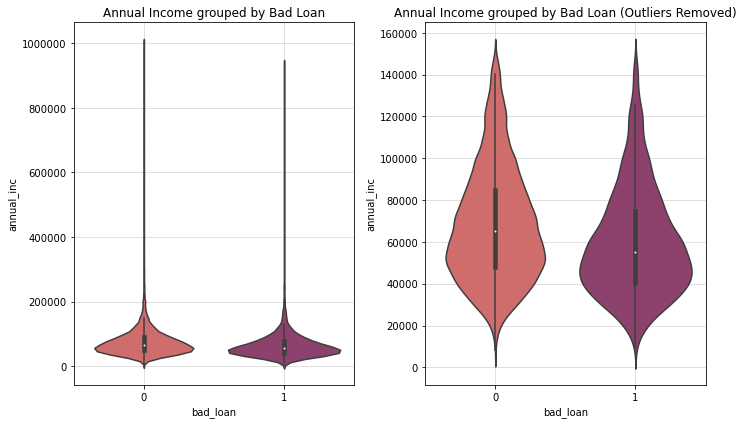

In [14]:
# Calculate outlier value
inc_outliers = (df.annual_inc.quantile(0.75) - df.annual_inc.quantile(0.25))*1.5 + df.annual_inc.quantile(0.75)

# Initialise 2 side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot violin plot
sns.violinplot(ax=axes[0], x='bad_loan', y='annual_inc', data=df, palette='flare')
axes[0].set_title('Annual Income grouped by Bad Loan')
sns.violinplot(ax=axes[1], x='bad_loan', y='annual_inc', data=df[df['annual_inc'] <= inc_outliers], palette='flare')
axes[1].set_title('Annual Income grouped by Bad Loan (Outliers Removed)')

# Visual settings
axes[0].grid(True, axis='both', color='#DAD8D7')
axes[0].set_axisbelow(True)
axes[0].ticklabel_format(style='plain', axis='y')
axes[1].grid(True, axis='both', color='#DAD8D7')
axes[1].set_axisbelow(True)
fig.tight_layout()
plt.show()

- Income distribution of defaulters are more positively skewed compared to non-defaulters (Higher income leads to lower chance of defaulting).

#### Employment Length

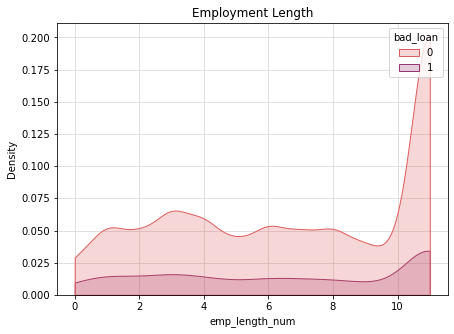

In [15]:
# Plot density plot
plt.figure(figsize=(7,5))
sns.kdeplot(x='emp_length_num', data=df, palette='flare', hue='bad_loan', shade=True, clip=(0,11))

# Visual settings
plt.grid(True, axis='both', color='#DAD8D7')
plt.gca().set_axisbelow(True)
plt.title('Employment Length')
plt.show()

- Defaulting individuals makes up the minority of individuals with 11 or more years of employment.
- Other than above, employment length does not correlate with defaulting.

#### Debt-to-Income Ratio

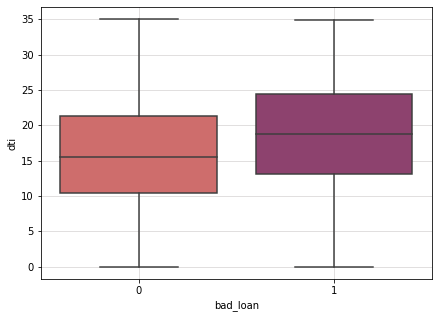

In [16]:
# Plot boxplot 
plt.figure(figsize=(7,5))
sns.boxplot(x='bad_loan', y='dti', data=df, palette='flare')

# Visual settings
plt.grid(True, axis='both', color='#DAD8D7')
plt.gca().set_axisbelow(True)
plt.show()

- Defaulters tend to have a higer DTI ratio.

#### Revolving Credit Utilisation Rate

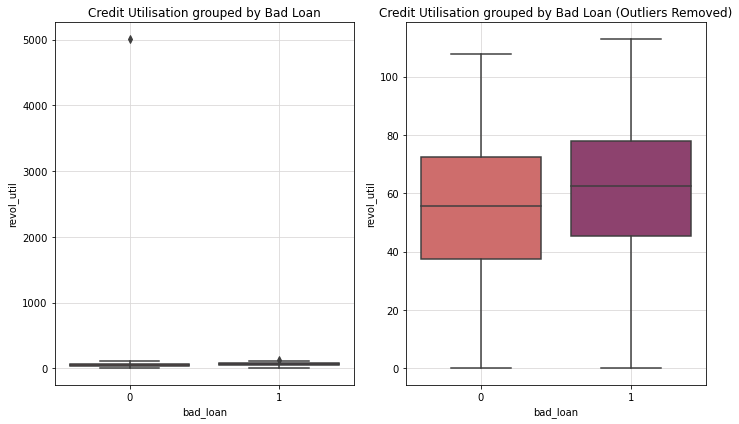

In [17]:
# Calculate outlier value
rev_outliers = (df.revol_util.quantile(0.75) - df.revol_util.quantile(0.25))*1.5 + df.revol_util.quantile(0.75)

# Initialise 2 side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot boxplots
sns.boxplot(ax=axes[0], x='bad_loan', y='revol_util', data=df, palette='flare')
axes[0].set_title('Credit Utilisation grouped by Bad Loan')
sns.boxplot(ax=axes[1], x='bad_loan', y='revol_util', data=df[df['revol_util'] <= rev_outliers], palette='flare')
axes[1].set_title('Credit Utilisation grouped by Bad Loan (Outliers Removed)')

# Visual settings
axes[0].grid(True, axis='both', color='#DAD8D7')
axes[0].set_axisbelow(True)
axes[0].ticklabel_format(style='plain', axis='y')
axes[1].grid(True, axis='both', color='#DAD8D7')
axes[1].set_axisbelow(True)
fig.tight_layout()
plt.show()

- Defaulters tend to have a larger credit utilisation rate.

#### Late Fees Received

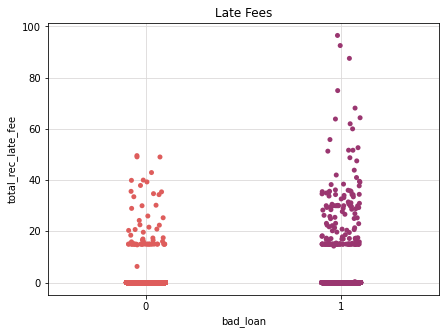

In [18]:
# Plot strip plot
plt.figure(figsize=(7,5))
sns.stripplot(x='bad_loan', y='total_rec_late_fee', data=df, palette='flare')

# Visual settings
plt.grid(True, axis='both', color='#DAD8D7')
plt.gca().set_axisbelow(True)
plt.title('Late Fees')
plt.show()

- Total fees amounting above 20 tend to be defaulters. Defaulters tend to pay larger fees.

#### Overdraft Ratio

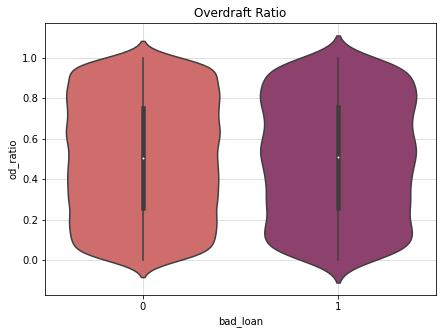

In [19]:
# Plot violin plot
plt.figure(figsize=(7,5))
sns.violinplot(x='bad_loan', y='od_ratio', data=df, palette='flare')

# Visual settings
plt.grid(True, axis='both', color='#DAD8D7')
plt.gca().set_axisbelow(True)
plt.title('Overdraft Ratio')
plt.show()

- Similar distribution, no correlation between defaulting and overdraft ratio can be drawn.

#### Correlation Heatmap

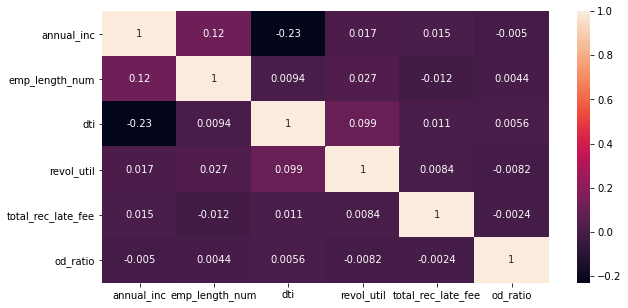

In [20]:
# Load numerical features
numeric_df = df[['annual_inc', 'emp_length_num', 'dti', 'revol_util', 'total_rec_late_fee', 'od_ratio']]

# Plot correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

- Weak negative correlation between DTI and annual income. As DTI increases, annual income decreases.
- Weak positive correlation between employment length and annual income. As employment length increases, annual income increases.